# 14. Making Plots and Maps with Altair

The Python Altair library is great because it works with both pandas dataframes and geopandas geodataframes. It allows you to create all kinds of plots and also to make makes. Moreover the plots can be linked to the maps (but not vice versa) so that selecting data on the plot in turn highlights the geographies for related areas. We demonstrate this below with census data.

This is powerful because you can do all this with just one Python library - instead of learning one for plotting and one for mapping.  You can do this with matplotlib as well but the Altair syntax is a bit less complex.


For more information see the Altair website: https://altair-viz.github.io/

In [4]:
#Import libraries including altair
import numpy as np
import pandas as pd
import altair as alt

In [5]:
# Uncomment & Install or Upgrade geopandas if necessary
#!pip install GeoPandas==0.8.2

In [6]:
import geopandas as gpd

/opt/anaconda3/envs/geo_env2/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [7]:
!ls notebook_data/census/ACS5yr/

census_income_CA_2018.csv        census_variables_CA_2013.zip
census_mhhinc_CA_county_2018.csv census_variables_CA_2018.csv
census_tracts_CA_2018.zip        census_variables_CA_2018.zip
census_variables_CA.csv          s4_cenvars_CA.csv
census_variables_CA_2013.csv     s4_cenvars_CA_2018.csv


## Load ACS 5 year (2014 - 2018) data

In [8]:
df = pd.read_csv("notebook_data/census/ACS5yr/census_variables_CA_2018.csv", dtype={'FIPS_11_digit':str})

In [9]:
# Take a look at the data
df.head()

,NAME,c_race,c_white,c_black,c_asian,c_latinx,c_race_moe,c_white_moe,c_black_moe,c_asian_moe,...,p_stay,p_movelocal,p_movecounty,p_movestate,p_moveabroad,p_car,p_carpool,p_transit,p_bike,p_walk
0,"Census Tract 8.02, Merced County, California",3996,1609,50,231,2082,323,249,36,103,...,0.849861,0.146589,0.003551,0.000000,0.000000,0.824308,0.122142,0.012635,0.000000,0.000000
1,"Census Tract 9.01, Merced County, California",3836,1402,97,34,2220,495,186,46,25,...,0.828443,0.149088,0.019561,0.001586,0.001322,0.787925,0.067170,0.000000,0.000000,0.096604
2,"Census Tract 15.02, Merced County, California",2493,158,18,124,2154,227,105,22,57,...,0.853787,0.104901,0.018226,0.009721,0.013366,0.644815,0.094160,0.008343,0.011919,0.057211
3,"Census Tract 9.02, Merced County, California",9811,3752,87,1358,4172,796,863,83,621,...,0.891211,0.095677,0.004302,0.000000,0.008810,0.908548,0.043962,0.000000,0.000000,0.007598
4,"Census Tract 12, Merced County, California",5431,2187,137,358,2388,450,266,104,140,...,0.920141,0.058824,0.005398,0.010797,0.004840,0.838724,0.064245,0.000443,0.000000,0.012406


In [10]:
# See what columns we have complete data for (no nulls) and what the datatypes are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              8057 non-null   object 
 1   c_race            8057 non-null   int64  
 2   c_white           8057 non-null   int64  
 3   c_black           8057 non-null   int64  
 4   c_asian           8057 non-null   int64  
 5   c_latinx          8057 non-null   int64  
 6   c_race_moe        8057 non-null   int64  
 7   c_white_moe       8057 non-null   int64  
 8   c_black_moe       8057 non-null   int64  
 9   c_asian_moe       8057 non-null   int64  
 10  c_latinx_moe      8057 non-null   int64  
 11  state_fips        8057 non-null   int64  
 12  county_fips       8057 non-null   int64  
 13  tract_fips        8057 non-null   int64  
 14  med_rent          7906 non-null   float64
 15  med_hhinc         7965 non-null   float64
 16  c_tenants         8057 non-null   int64  


## Subset the data so we are only looking at Alameda County (fips code == 1)

In [11]:
df2 = df[df.county_fips==1]

In [12]:
df2.head(2)

,NAME,c_race,c_white,c_black,c_asian,c_latinx,c_race_moe,c_white_moe,c_black_moe,c_asian_moe,...,p_stay,p_movelocal,p_movecounty,p_movestate,p_moveabroad,p_car,p_carpool,p_transit,p_bike,p_walk
266,"Census Tract 4415.01, Alameda County, California",6570,677,111,4740,570,363,148,83,389,...,0.925897,0.039593,0.010476,0.019874,0.004160,0.761761,0.113940,0.054812,0.012085,0.003453
267,"Census Tract 4047, Alameda County, California",2079,1515,134,199,175,133,137,62,89,...,0.891826,0.028390,0.037690,0.031816,0.010279,0.532093,0.177674,0.158140,0.006512,0.005581


## Make an Altair scatter plot 

that visualizes the relationship between median household income and the percent of households that are owner-occupied.


In [13]:
alt.Chart(df2).mark_circle(size=50).encode(
   x='med_hhinc',
   y='p_owners'
).properties(
   height=350, width=500
)

alt.Chart(...)

In [14]:
df2.shape

(361, 66)

In [15]:
!ls notebook_data/census/Tracts

cb_2013_06_tract_500k.zip            cb_2018_06_tract_500k.shp.ea.iso.xml
cb_2017_06_tract_500k.zip            cb_2018_06_tract_500k.shp.iso.xml
cb_2018_06_tract_500k.cpg            cb_2018_06_tract_500k.shx
cb_2018_06_tract_500k.dbf            cb_2018_06_tract_500k.zip
cb_2018_06_tract_500k.prj            oakland_tracts_2018.zip
cb_2018_06_tract_500k.shp


## Read in the Census Tract geographic data

into a GeoPandas GeoDataFrame

In [16]:
tracts = gpd.read_file('zip://./notebook_data/census/Tracts/cb_2018_06_tract_500k.zip')

In [17]:
tracts.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."


<AxesSubplot:>

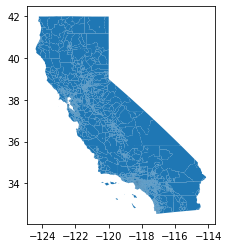

In [18]:
tracts.plot()

## Subset to keep only the tracts for Alameda County

In [19]:
tracts=tracts[tracts.COUNTYFP=='001']

<AxesSubplot:>

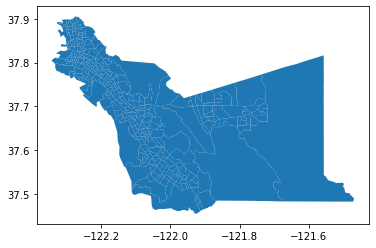

In [20]:
tracts.plot()

## Merge the ACS dataframe into the census tracts geodataframe

In [21]:
tracts2 = tracts.merge(df2, how='left', left_on="GEOID", right_on="FIPS_11_digit")

In [22]:
tracts2.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,...,p_stay,p_movelocal,p_movecounty,p_movestate,p_moveabroad,p_car,p_carpool,p_transit,p_bike,p_walk
0,06,001,425101,1400000US06001425101,06001425101,4251.01,CT,590870,2045459,"POLYGON ((-122.31419 37.84231, -122.29923 37.8...",...,0.865239,0.036524,0.035894,0.037154,0.025189,0.550998,0.107539,0.169623,0.015521,0.062084
1,06,001,428600,1400000US06001428600,06001428600,4286,CT,898967,1080420,"POLYGON ((-122.27993 37.76818, -122.27849 37.7...",...,0.767469,0.067846,0.110467,0.036532,0.017686,0.550140,0.019048,0.270588,0.034734,0.035294


## Create a Thematic Map

Use the Geopandas Plot method to create a map of tracts colored by median household income values.

<AxesSubplot:>

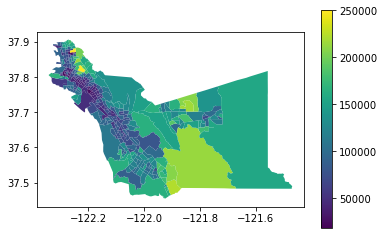

In [23]:
tracts2.plot(column='med_hhinc', legend=True)

## Make the same map with Altair

In [24]:
alt.Chart(tracts2).mark_geoshape().encode(
    color='med_hhinc'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

## Link Atair Scatterplot and Map

In [25]:
# First create a selection object
my_selection = alt.selection_interval()

# Create a background map
background_map = alt.Chart(tracts2).mark_geoshape(
    fill= 'lightgray',
    stroke = 'white'
).properties(
    width=400,
    height=300
)

# Create the interactive scatterplot
# by addng the selection object
the_scatterplot = alt.Chart(tracts2).mark_circle(size=50).encode(
   x='med_hhinc',
   y='p_owners'
).properties(
   width=375,
   height=300
).add_selection(
    my_selection
)

# Create the interactive map
# by adding the selection object
income_map = alt.Chart(tracts2).mark_geoshape().encode(
    color='med_hhinc'
).properties(
    width=400,
    height=350
).transform_filter(
    my_selection
)

# Link the maps (background_map and income_map)
# to the scatterplot (the_scatterplot)
the_scatterplot | (background_map + income_map)

alt.HConcatChart(...)

## Try dragging a box around a subset of the points on the scatterplot and see what happens to the map.